In [1]:
#library(ggplot2)
#options(repr.plot.height=4,repr.plot.width=6)

**Cargar los datos en un dataframe llamado: airbnb**

In [2]:
airbnb<-read.csv('/content/airbnb.csv',sep = ',', stringsAsFactors = T)

**Mostrar las primeras 6 filas del dataframe**

In [3]:
head(airbnb)


,Zipcode,Neighbourhood.Cleansed,Property.Type,Room.Type,Accommodates,Bathrooms,Bedrooms,Beds,Bed.Type,Amenities,Square.Feet,Price,Review.Scores.Rating
,<fct>,<fct>,<fct>,<fct>,<int>,<dbl>,<int>,<int>,<fct>,<fct>,<int>,<int>,<int>
1,28004,Universidad,Apartment,Private room,2,2,1,1,Real Bed,"TV,Wireless Internet,Kitchen,Pets allowed,Pets live on this property,Buzzer/wireless intercom,Heating,Suitable for events,Washer,First aid kit,Essentials,Lock on bedroom door,Iron",NA,35,NA
2,28004,Universidad,Apartment,Entire home/apt,6,1,3,5,Real Bed,"TV,Internet,Wireless Internet,Air conditioning,Kitchen,Indoor fireplace,Heating,Family/kid friendly,Washer,Dryer,Smoke detector,Carbon monoxide detector,Essentials,Shampoo",NA,92,96
3,28004,Universidad,Apartment,Entire home/apt,3,1,2,2,Real Bed,"TV,Internet,Wireless Internet,Air conditioning,Kitchen,Doorman,Heating,Family/kid friendly,Washer,Essentials,Shampoo,Hangers,Hair dryer,Iron,Laptop friendly workspace",NA,55,91
4,28004,Universidad,Loft,Entire home/apt,3,2,1,1,Real Bed,"TV,Internet,Wireless Internet,Air conditioning,Kitchen,Pets allowed,Breakfast,Elevator in building,Indoor fireplace,Buzzer/wireless intercom,Heating,Washer,Essentials,Shampoo,Hangers,Hair dryer,Iron,Laptop friendly workspace,translation missing: en.hosting_amenity_49,translation missing: en.hosting_amenity_50",NA,60,100
5,28015,Universidad,Apartment,Entire home/apt,5,1,1,1,Real Bed,"TV,Wireless Internet,Air conditioning,Kitchen,Smoking allowed,Pets allowed,Elevator in building,Heating,Family/kid friendly,Washer,Essentials,Iron",538,75,90
6,28004,Universidad,Apartment,Entire home/apt,2,1,0,1,Real Bed,"TV,Cable TV,Internet,Wireless Internet,Air conditioning,Wheelchair accessible,Kitchen,Doorman,Elevator in building,Buzzer/wireless intercom,Heating,Washer,Smoke detector,Carbon monoxide detector,First aid kit,Safety card,Fire extinguisher,Essentials,Shampoo,24-hour check-in,Hangers,Hair dryer,Iron,Laptop friendly workspace,Self Check-In,Doorman Entry",NA,55,95


**Renombrar las columnas de la siguiente forma:**

| Nombre original | Nuevo nombre |
| - | - |
| Zipcode | CodigoPostal |
| Neighbourhood.Cleansed | Barrio |
| Property.Type	| TipoPropiedad |
| Room.Type | TipoAlquiler |
| Accommodates | MaxOcupantes |
| Bathrooms	| NumBanyos |
| Bedrooms	| NumDormitorios |
| Beds	|  NumCamas |
| Bed.Type	| TipoCama |
| Amenities | Comodidades |
| Square.Feet | PiesCuadrados |
| Price	| Precio |
| Review.Scores.Rating | Puntuacion |

In [4]:
newnames<-c("CodigoPostal","Barrio","TipoPropiedad","TipoAlquiler","MaxOcupantes","NumBanyos",
"NumDormitorios","NumCamas","TipoCama","Comodidades","PiesCuadrados","Precio","Puntuacion")


**Crea una nueva columna llamada MetrosCuadrados a partir de la columna PiesCuadrados.**

**Ayuda: 1 pie cuadrado son 0,092903 metros cuadrdados **

In [5]:
list.of.packages <- c("tidyverse","corrplot","ggplot2", "GGally", "MASS")
{
 new.packages <- list.of.packages[!(list.of.packages %in% installed.packages()[,"Package"])]
 if(length(new.packages)) install.packages(new.packages)
 lapply(list.of.packages, require, character.only = TRUE)
}
require (tidyverse)
require (corrplot)
require (ggplot2)
require(GGally)
require (MASS)

Loading required package: tidyverse

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.6     ✔ dplyr   1.0.8
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Loading required package: corrplot

corrplot 0.92 loaded

Loading required package: GGally

Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2

Loading required package: MASS


Attaching package: ‘MASS’


The following object is masked from ‘package:dplyr’:

    select




[[1]]
[1] TRUE

[[2]]
[1] TRUE

[[3]]
[1] TRUE

[[4]]
[1] TRUE

[[5]]
[1] TRUE

In [6]:
names(airbnb)<-newnames
airbnb$MetrosCuadrados<-airbnb$PiesCuadrados*0.092903
names(airbnb)

[1] "CodigoPostal"    "Barrio"          "TipoPropiedad"   "TipoAlquiler"   
 [5] "MaxOcupantes"    "NumBanyos"       "NumDormitorios"  "NumCamas"       
 [9] "TipoCama"        "Comodidades"     "PiesCuadrados"   "Precio"         
[13] "Puntuacion"      "MetrosCuadrados"

**Miremos el código postal. Es una variable con entradas erroneas.
Hay valores como '', '-'  y '28' que deberían ser considerados como NA.
Así mismo también debería ser NA todos los que no compiencen por 28, ya que estamos con códigos postales de Madrid**

**El código postal 28002, 28004 y 28051 tienen entradas repetidas. **
**Por ejemplo las entradas 28002\n20882 deberían ir dnetro de 28002**

**El codigo 2804 debería ser 28004, 2805 deberia ser 28005 y 2815 juncto con 2815 debería ser 28015**

**Limpia los datos de la columna Codigo Postal**

In [7]:
str(airbnb$CodigoPostal)

 Factor w/ 77 levels "","-","20013",..: 15 15 15 15 26 15 15 15 26 15 ...


In [8]:
airbnb$CodigoPostal <- as.character(airbnb$CodigoPostal)
airbnb$CodigoPostal[airbnb$CodigoPostal == ""] <- 'NA'
airbnb$CodigoPostal[airbnb$CodigoPostal == "-"] <- 'NA'
airbnb$CodigoPostal[airbnb$CodigoPostal == "28002\n20882"] <- '28002'
airbnb$CodigoPostal[airbnb$CodigoPostal == "28002\n28002"] <- '28002'
airbnb$CodigoPostal[airbnb$CodigoPostal == "28051\n28051"] <- '28051'
airbnb$CodigoPostal[airbnb$CodigoPostal == "2804"] <- '28004'
airbnb$CodigoPostal[airbnb$CodigoPostal == "2805"] <- '28005'
airbnb$CodigoPostal[airbnb$CodigoPostal == "2815"] <- '28015'
airbnb$CodigoPostal[airbnb$CodigoPostal == "280013"] <- '28013'
airbnb$CodigoPostal[substr(airbnb$CodigoPostal,1,2) != '28'] <- 'NA'
airbnb$CodigoPostal[nchar(airbnb$CodigoPostal) == 2] <- 'NA'
airbnb$CodigoPostal <- as.factor(airbnb$CodigoPostal)
str(airbnb)
levels(airbnb$CodigoPostal)







'data.frame':	13207 obs. of  14 variables:
 $ CodigoPostal   : Factor w/ 62 levels "28001","28002",..: 4 4 4 4 15 4 4 4 15 4 ...
 $ Barrio         : Factor w/ 125 levels "Abrantes","Acacias",..: 115 115 115 115 115 115 115 115 115 115 ...
 $ TipoPropiedad  : Factor w/ 22 levels "Apartment","Bed & Breakfast",..: 1 1 1 16 1 1 15 1 1 1 ...
 $ TipoAlquiler   : Factor w/ 3 levels "Entire home/apt",..: 2 1 1 1 1 1 2 1 1 1 ...
 $ MaxOcupantes   : int  2 6 3 3 5 2 7 3 2 4 ...
 $ NumBanyos      : num  2 1 1 2 1 1 5 1 1 2 ...
 $ NumDormitorios : int  1 3 2 1 1 0 1 1 1 2 ...
 $ NumCamas       : int  1 5 2 1 1 1 7 NA 1 2 ...
 $ TipoCama       : Factor w/ 5 levels "Airbed","Couch",..: 5 5 5 5 5 5 5 5 5 5 ...
 $ Comodidades    : Factor w/ 11073 levels "","Air conditioning,Breakfast,Washer,Essentials,Hair dryer",..: 9444 4020 3249 4039 8369 2047 961 7436 5618 7736 ...
 $ PiesCuadrados  : int  NA NA NA NA 538 NA NA NA 700 NA ...
 $ Precio         : int  35 92 55 60 75 55 60 70 90 155 ...
 $ Puntuacion

[1] "28001" "28002" "28003" "28004" "28005" "28006" "28007" "28008" "28009"
[10] "28010" "28011" "28012" "28013" "28014" "28015" "28016" "28017" "28018"
[19] "28019" "28020" "28021" "28022" "28023" "28024" "28025" "28026" "28027"
[28] "28028" "28029" "28030" "28031" "28032" "28033" "28034" "28035" "28036"
[37] "28037" "28038" "28039" "28040" "28041" "28042" "28043" "28044" "28045"
[46] "28046" "28047" "28048" "28049" "28050" "28051" "28052" "28053" "28054"
[55] "28055" "28056" "28058" "28060" "28094" "28105" "28850" "NA"

In [9]:
airbnb2 <- airbnb[!is.na(airbnb$CodigoPostal),]
airbnb2<-droplevels(airbnb2)
str(airbnb2)




'data.frame':	13207 obs. of  14 variables:
 $ CodigoPostal   : Factor w/ 62 levels "28001","28002",..: 4 4 4 4 15 4 4 4 15 4 ...
 $ Barrio         : Factor w/ 125 levels "Abrantes","Acacias",..: 115 115 115 115 115 115 115 115 115 115 ...
 $ TipoPropiedad  : Factor w/ 22 levels "Apartment","Bed & Breakfast",..: 1 1 1 16 1 1 15 1 1 1 ...
 $ TipoAlquiler   : Factor w/ 3 levels "Entire home/apt",..: 2 1 1 1 1 1 2 1 1 1 ...
 $ MaxOcupantes   : int  2 6 3 3 5 2 7 3 2 4 ...
 $ NumBanyos      : num  2 1 1 2 1 1 5 1 1 2 ...
 $ NumDormitorios : int  1 3 2 1 1 0 1 1 1 2 ...
 $ NumCamas       : int  1 5 2 1 1 1 7 NA 1 2 ...
 $ TipoCama       : Factor w/ 5 levels "Airbed","Couch",..: 5 5 5 5 5 5 5 5 5 5 ...
 $ Comodidades    : Factor w/ 11073 levels "","Air conditioning,Breakfast,Washer,Essentials,Hair dryer",..: 9444 4020 3249 4039 8369 2047 961 7436 5618 7736 ...
 $ PiesCuadrados  : int  NA NA NA NA 538 NA NA NA 700 NA ...
 $ Precio         : int  35 92 55 60 75 55 60 70 90 155 ...
 $ Puntuacion

**Una vez limpios los datos ¿Cuales son los códigos postales que tenemos? **

In [10]:
table(airbnb2$CodigoPostal, exclude = 'NA')


28001 28002 28003 28004 28005 28006 28007 28008 28009 28010 28011 28012 28013 
  231   171   185  1795  1195   218   206   338   216   384   250  2060  1020 
28014 28015 28016 28017 28018 28019 28020 28021 28022 28023 28024 28025 28026 
  630   601    76   107    43   200   192    58    30    23    44   123    93 
28027 28028 28029 28030 28031 28032 28033 28034 28035 28036 28037 28038 28039 
  122   263   110    73    27    33    89    45    59    67    65    77   160 
28040 28041 28042 28043 28044 28045 28046 28047 28048 28049 28050 28051 28052 
   16    63    90   103    19   495    32    67     1     3    58    17     1 
28053 28054 28055 28056 28058 28060 28094 28105 28850 
   85    12    12     1     1     1     1     1     1 

**¿Cuales son los 5 códigos postales con más entradas? ¿Y con menos? ¿Cuantas entradas tienen?**

***Respuesta:*** Los códigos postales con más entradas son:

In [11]:
head(sort(table(airbnb2$CodigoPostal, exclude = 'NA'),decreasing= TRUE),5)



28012 28004 28005 28013 28014 
 2060  1795  1195  1020   630 

**Respuesta:** Los códigos postales con menos entradas son:

In [12]:
tail(sort(table(airbnb2$CodigoPostal, exclude = 'NA'),decreasing= TRUE),5)


28058 28060 28094 28105 28850 
    1     1     1     1     1 

**¿Cuales son los barrios que hay en el código postal 28012?**

In [13]:
airbnb3<-subset(airbnb2$Barrio, airbnb2$CodigoPostal == '28012')
unique(airbnb3)
dplyr::select(airbnb2, CodigoPostal, Barrio) %>% filter(CodigoPostal =='28012') -> airbnb3
head(airbnb3,5)
airbnb3<-droplevels(airbnb3)
str(airbnb3)
unique(airbnb3$Barrio)
#unique(subset(airbnb2$Barrio, airbnb2$CodigoPostal == '28012'))

[1] Sol             Acacias         Palos de Moguer Embajadores    
 [5] Cortes          Palacio         Universidad     Delicias       
 [9] Arapiles        Atocha          Goya           
125 Levels: Abrantes Acacias Adelfas Aeropuerto Aguilas ... Zofío

,CodigoPostal,Barrio
,<fct>,<fct>
1,28012,Sol
2,28012,Sol
3,28012,Sol
4,28012,Sol
5,28012,Acacias


'data.frame':	2060 obs. of  2 variables:
 $ CodigoPostal: Factor w/ 1 level "28012": 1 1 1 1 1 1 1 1 1 1 ...
 $ Barrio      : Factor w/ 11 levels "Acacias","Arapiles",..: 10 10 10 10 1 10 10 10 10 9 ...


[1] Sol             Acacias         Palos de Moguer Embajadores    
 [5] Cortes          Palacio         Universidad     Delicias       
 [9] Arapiles        Atocha          Goya           
11 Levels: Acacias Arapiles Atocha Cortes Delicias Embajadores Goya ... Universidad

**¿Cuantas entradas hay en cada uno de esos barrios para el codigo postal 28012?**

In [14]:
airbnb3<-droplevels(airbnb3)
airbnb3<-data.frame(airbnb3)
table(airbnb3$Barrio, exclude = c(0,'NA'))
#airbnb3<-airbnb[airbnb$CodigoPostal == '28012',]
#str(airbnb3)
#airbnb3<-droplevels(airbnb3)
#table(airbnb3$Barrio, exclude = c(0,'NA'))


        Acacias        Arapiles          Atocha          Cortes        Delicias 
             13               1               1             216               1 
    Embajadores            Goya         Palacio Palos de Moguer             Sol 
           1449               1              27              46             301 
    Universidad 
              4 

**¿Cuantos barrios hay en todo el dataset airbnb? ¿Cuales son?**

In [15]:
airbnb2<-droplevels(airbnb2)
unique(airbnb2$Barrio)
#str(airbnb2$Barrio)
length(levels(airbnb2$Barrio))

[1] Universidad                  Sol                         
  [3] Imperial                     Acacias                     
  [5] Chopera                      Delicias                    
  [7] Palos de Moguer              Embajadores                 
  [9] Cortes                       Atocha                      
 [11] Pacífico                     Adelfas                     
 [13] Estrella                     Ibiza                       
 [15] Jerónimos                    Niño Jesús                  
 [17] Palacio                      Justicia                    
 [19] Recoletos                    Goya                        
 [21] Fuente del Berro             Arapiles                    
 [23] Trafalgar                    Almagro                     
 [25] Guindalera                   Lista                       
 [27] Castellana                   El Viso                     
 [29] Prosperidad                  Valverde                    
 [31] Casa de Campo                El Goloso                   
 [33] Numancia                     Cármenes                    
 [35] Puerta del Angel             Lucero                      
 [37] Aluche                       San Isidro                  
 [39] Campamento                   Comillas                    
 [41] Opañel                       Vista Alegre                
 [43] Ciudad Jardín                Hispanoamérica              
 [45] Nueva España                 Castilla                    
 [47] Bellas Vistas                Cuatro Caminos              
 [49] Castillejos                  Vallehermoso                
 [51] Almenara                     Valdeacederas               
 [53] Berruguete                   Gaztambide                  
 [55] Rios Rosas                   Peñagrande                  
 [57] Argüelles                    Puerta Bonita               
 [59] Buenavista                   Abrantes                    
 [61] Orcasur                      San Fermín                  
 [63] Almendrales                  Pradolongo                  
 [65] Portazgo                     Entrevías                   
 [67] San Diego                    Palomeras Bajas             
 [69] Fontarrón                    Vinateros                   
 [71] Ventas                       Pueblo Nuevo                
 [73] Quintana                     Concepción                  
 [75] San Juan Bautista            Costillares                 
 [77] Piovera                      Canillas                    
 [79] Pinar del Rey                Apostol Santiago            
 [81] San Andrés                   Valdefuentes                
 [83] Butarque                     Los Angeles                 
 [85] Casco Histórico de Vicálvaro Simancas                    
 [87] Rejas                        Salvador                    
 [89] Casco Histórico de Barajas   Pilar                       
 [91] La Paz                       Mirasierra                  
 [93] Ciudad Universitaria         Moscardó                    
 [95] Palomeras Sureste            Marroquina                  
 [97] Media Legua                  Los Rosales                 
 [99] Casco Histórico de Vallecas  Timón                       
[101] Corralejos                   Cuatro Vientos              
[103] Colina                       San Cristobal               
[105] Alameda de Osuna             Aeropuerto                  
[107] Palomas                      Zofío                       
[109] Aguilas                      Legazpi                     
[111] Fuentelareina                Aravaca                     
[113] Ambroz                       Canillejas                  
[115] Valdezarza                   Amposta                     
[117] San Pascual                  Santa Eugenia               
[119] Arcos                        Rosas                       
[121] Valdemarín                   El Plantío                  
[123] Hellín                       Pavones                     
[125] Orcasitas                   

[1] 125

**¿Cuales son los 5 barrios que tienen mayor número entradas?**

In [16]:
head(sort(table(airbnb2$Barrio, exclude = c(0,'NA')),decreasing = T),5)


Embajadores Universidad     Palacio         Sol    Justicia 
       1844        1358        1083         940         785 

**¿Cuantos Tipos de Alquiler diferentes hay? ¿Cuales son? ¿Cuantas entradas en el dataframe hay por cada tipo?**

In [17]:
str(airbnb2$TipoAlquiler)
unique(airbnb2$TipoAlquiler)
sort(table(airbnb2$TipoAlquiler, exclude = c(0,'NA')),decreasing = T)

 Factor w/ 3 levels "Entire home/apt",..: 2 1 1 1 1 1 2 1 1 1 ...


[1] Private room    Entire home/apt Shared room    
Levels: Entire home/apt Private room Shared room


Entire home/apt    Private room     Shared room 
           7903            5113             191 

**Muestra el diagrama de cajas del precio para cada uno de los diferentes Tipos de Alquiler**

Warning message:
“Removed 1769 rows containing non-finite values (stat_boxplot).”


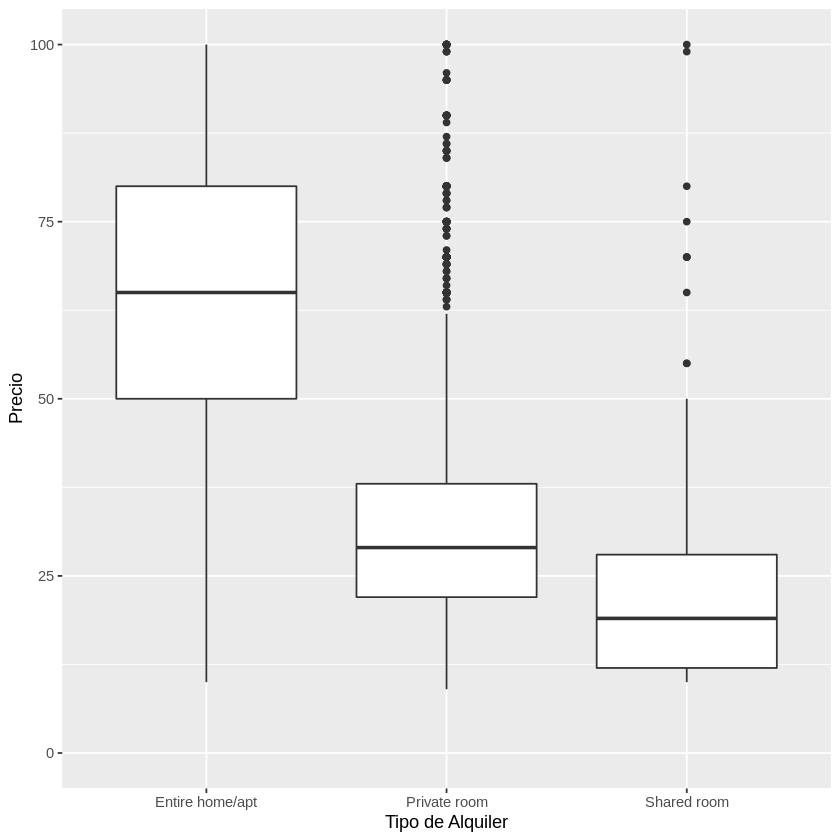

In [18]:

ggplot(data=subset(airbnb2, !is.na(TipoAlquiler)),aes(x=TipoAlquiler, y=Precio))+geom_boxplot()+ 
scale_color_discrete(name="Análisis precios pro tipo alquiler")+ylab('Precio')+xlab('Tipo de Alquiler') + scale_y_continuous(limits=c(0,100))

**Cual es el precio medio de alquiler de cada uno, la diferencia que hay ¿es estadísticamente significativa?
¿Con que test lo comprobarías?**

***Nota:*** He realizado un filtro. Se han seleccionado los valores cuyo precio es inferior a 100, ya que existen importes outliers que distorsionan la media 

In [19]:
#install.packages("tidyverse")
#library("tidyverse")

In [20]:
#install.packages("dplyr")
#library("dplyr")

In [21]:
precio_medio_por_tipo_alquiler <- data.frame(airbnb2) %>%  
filter(Precio < 100) %>%
group_by(TipoAlquiler) %>% summarise(mean=mean(Precio, na.rm=TRUE))
precio_medio_por_tipo_alquiler -> tbl
tbl
tbl1<-data.frame(airbnb2) %>%  filter(Precio < 100 ) %>% dplyr::select (TipoAlquiler, Precio) %>% as.data.frame()
str(tbl1)
summary(aov( Precio ~ TipoAlquiler, data=tbl1))


TipoAlquiler,mean
<fct>,<dbl>
Entire home/apt,64.29668
Private room,31.44380
Shared room,22.63388


'data.frame':	11158 obs. of  2 variables:
 $ TipoAlquiler: Factor w/ 3 levels "Entire home/apt",..: 2 1 1 1 1 1 2 1 1 1 ...
 $ Precio      : int  35 92 55 60 75 55 60 70 90 70 ...


                Df  Sum Sq Mean Sq F value Pr(>F)    
TipoAlquiler     2 3068558 1534279    6228 <2e-16 ***
Residuals    11155 2748101     246                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

***Respuesta:***Primeramente presuponemos que siguen una distribución normal. Y usamos ANOVA para comparar las medias de tres o más grupos de datos. El p-valor es realmente bajo, por lo que podemos rechazar la hipótesis nula que era que las medias eran iguales. Con lo cual la diferencia que hay entre las medias no es estadísticamente significativa. Pero en la primera parte hemos comentido un sesgo que es presuponer que sigue una distribución normal
Por eso se aplica el test de shapiro-Wilk para ver la normalidad de la distribución y sale en los tres casos que no sigue una distribución normal. Con lo cual el test que hay que aplicar más correctamente es el Kruskal-Wallis y como se obtiene un p-value tan pequeño se rechaza la hipotesis nula.
Como conclusión las medias no son iguales y las diferencias que existen entre las medias no son estadisticamente significativas.*texto en cursiva*

**Filtra el dataframe cuyos tipo de alquiler sea  'Entire home/apt' y guardalo en un dataframe llamado 
*airbnb_entire*.
Estas serán las entradas que tienen un alquiler del piso completo.**

In [22]:
airbnb_entire<-data.frame(airbnb2) %>%  
filter(TipoAlquiler == 'Entire home/apt' ) %>% 
as.data.frame()
airbnb_entire <- droplevels(airbnb_entire)
summary (airbnb_entire)

  CodigoPostal          Barrio                TipoPropiedad 
 28012  :1435   Embajadores:1228   Apartment         :6995  
 28004  :1271   Universidad: 984   House             : 327  
 28005  : 803   Palacio    : 769   Loft              : 250  
 28013  : 721   Sol        : 701   Condominium       : 188  
 28014  : 473   Cortes     : 574   Other             : 111  
 28015  : 354   Justicia   : 534   Serviced apartment:  11  
 (Other):2846   (Other)    :3113   (Other)           :  21  
          TipoAlquiler   MaxOcupantes      NumBanyos     NumDormitorios  
 Entire home/apt:7903   Min.   : 1.000   Min.   :0.000   Min.   : 0.000  
                        1st Qu.: 3.000   1st Qu.:1.000   1st Qu.: 1.000  
                        Median : 4.000   Median :1.000   Median : 1.000  
                        Mean   : 4.051   Mean   :1.241   Mean   : 1.463  
                        3rd Qu.: 5.000   3rd Qu.:1.000   3rd Qu.: 2.000  
                        Max.   :16.000   Max.   :6.500   Max.   :10.

**¿Cuales son los 5 barrios que tienen un mayor número de apartamentos enteros en alquiler?
Nota: Mirar solo en airbnb_entire. A partir de este punto y hasta que se diga lo contrario partiremos de airbnb_entire.**

In [23]:
head(sort(table(airbnb_entire$Barrio, exclude = c(0,'NA')),decreasing = T),5)


Embajadores Universidad     Palacio         Sol      Cortes 
       1228         984         769         701         574 

**¿Cuales son los 5 barrios que tienen un mayor precio medio de alquiler para apartamentos enteros (es decir, del dataframe airbnb_entire)?**

**¿Cual es su precio medio?**

Ayuda: Usa la función aggregate `aggregate(.~colname,df,mean,na.rm=TRUE)`

In [24]:
mean_price<-aggregate(Precio ~ Barrio, airbnb_entire, mean,na.rm=TRUE)
#mean_price
top_5 <- data.frame(head(mean_price[order(-mean_price$Precio),],5))
top_5

,Barrio,Precio
,<fct>,<dbl>
77,Palomas,309.7500
50,Fuentelareina,180.0000
93,Recoletos,161.9254
43,El Plantío,150.0000
30,Castellana,141.3889


**¿Cuantos apartamentos hay en cada uno de esos barrios?**

**Mostrar una dataframe con el nombre del barrio, el precio y el número de entradas.**

Ayuda: Podeis crear un nuevo dataframe con las columnas "Barrio" y "Freq" que contenga el número de entradas en cada barrio y hacer un merge con el dataframe del punto anterior.

In [25]:
freq <- airbnb_entire %>% dplyr::select (Barrio) %>% mutate (freq = 1) %>% 
group_by(Barrio) %>% summarise( freq = n()) %>% arrange(desc(freq)) %>% as.data.frame()
entire <- merge(x = mean_price, y = freq, by = 'Barrio')
#freq_location <- freq_location[order(freq_location$Frequency),]
head(entire, 5)


,Barrio,Precio,freq
,<fct>,<dbl>,<int>
1,Abrantes,46.00000,3
2,Acacias,68.16393,61
3,Adelfas,68.72727,33
4,Aeropuerto,38.00000,2
5,Aguilas,54.50000,2


**Partiendo del dataframe anterior, muestra los 5 barrios con mayor precio, pero que tengan más de 100 entradas de alquiler.**

In [26]:
top_barrio_100 <- entire[entire$freq > 100,]
top_barrio_100_view <- data.frame(head(top_barrio_100[order(top_barrio_100$Precio, decreasing=TRUE, na.last=FALSE),],5))
top_barrio_100_view

,Barrio,Precio,freq
,<fct>,<dbl>,<int>
93,Recoletos,161.92537,135
52,Goya,111.33803,142
106,Sol,100.75036,701
108,Trafalgar,98.57848,223
59,Justicia,98.25468,534


**Dibuja el diagrama de densidad de distribución de los diferentes precios. Serían 5 gráficas, una por cada barrio.**

'data.frame':	1735 obs. of  14 variables:
 $ CodigoPostal   : Factor w/ 16 levels "28001","28003",..: 10 10 10 9 10 10 4 10 9 9 ...
 $ Barrio         : Factor w/ 5 levels "Goya","Justicia",..: 4 4 4 4 4 4 4 4 4 4 ...
 $ TipoPropiedad  : Factor w/ 5 levels "Apartment","Condominium",..: 1 2 1 1 1 1 1 1 1 1 ...
 $ TipoAlquiler   : Factor w/ 1 level "Entire home/apt": 1 1 1 1 1 1 1 1 1 1 ...
 $ MaxOcupantes   : int  4 6 4 6 4 4 10 6 4 4 ...
 $ NumBanyos      : num  1 1 1 1 1 1 2 1 1 1 ...
 $ NumDormitorios : int  1 2 1 2 1 1 4 2 1 1 ...
 $ NumCamas       : int  1 3 2 2 2 2 7 4 2 1 ...
 $ TipoCama       : Factor w/ 5 levels "Airbed","Couch",..: 5 5 5 5 5 5 5 5 5 5 ...
 $ Comodidades    : Factor w/ 1477 levels "","Cable TV,Internet,Wireless Internet,Air conditioning,Kitchen,Doorman,Elevator in building,Buzzer/wireless inter"| __truncated__,..: 1053 1055 450 743 650 1404 630 771 577 173 ...
 $ PiesCuadrados  : int  646 NA NA NA NA NA NA NA NA 753 ...
 $ Precio         : int  75 130 100 160 49

Warning message:
“Removed 1 rows containing non-finite values (stat_density).”


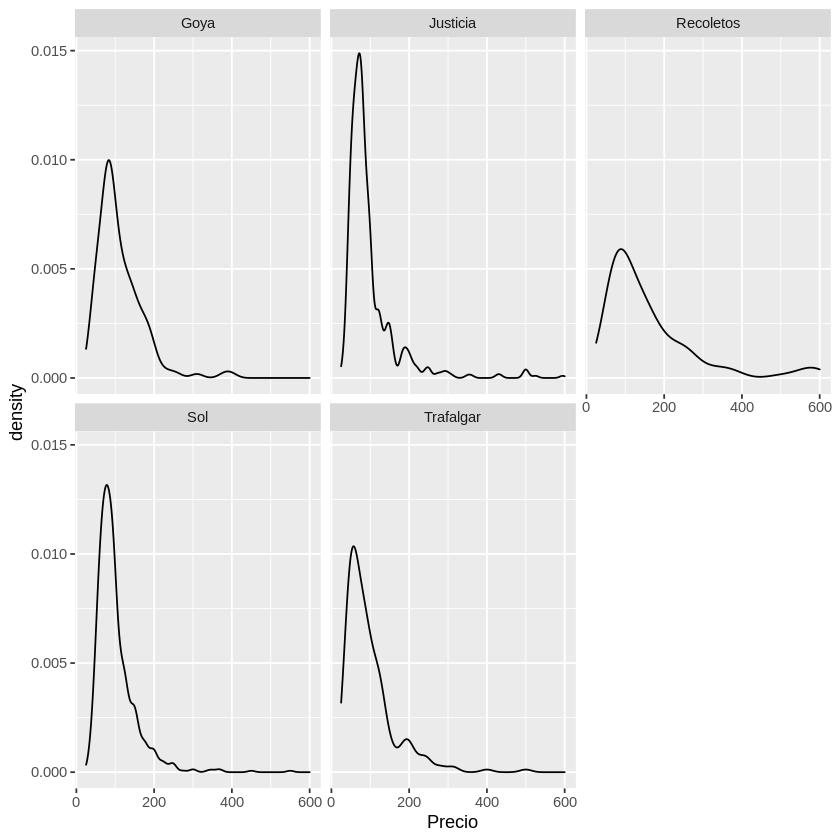

In [27]:
airbnb_entire2<-data.frame(airbnb_entire) %>%  
filter(Barrio %in% c('Recoletos','Goya','Sol','Trafalgar','Justicia')) %>% 
as.data.frame()
airbnb_entire2 <- droplevels(airbnb_entire2)
str (airbnb_entire2)
ggplot(data=airbnb_entire2, aes(Precio)) +
geom_density(alpha=0.7)+facet_wrap(~ Barrio)


**Calcula el tamaño medio, en metros cuadrados, para los 5 barrios anteriores y muestralo en el mismo dataframe junto con el precio y número de entradas**

In [28]:
mean_MetrosCuadrados<-aggregate(MetrosCuadrados ~ Barrio, airbnb_entire2, mean,na.rm=TRUE)
top_barrio_100_view2 <- merge(x = mean_MetrosCuadrados, y = top_barrio_100_view, by = 'Barrio', y.all=all)
head(top_barrio_100_view2, 5)

,Barrio,MetrosCuadrados,Precio,freq
,<fct>,<dbl>,<dbl>,<int>
1,Goya,51.68504,111.33803,142
2,Justicia,28.52669,98.25468,534
3,Recoletos,26.66316,161.92537,135
4,Sol,45.61692,100.75036,701
5,Trafalgar,29.30426,98.57848,223


**Dibuja el diagrama de densidad de distribución de los diferentes tamaños de apartamentos. Serían 5 gráficas, una por cada barrio.**

Warning message:
“Removed 1645 rows containing non-finite values (stat_density).”


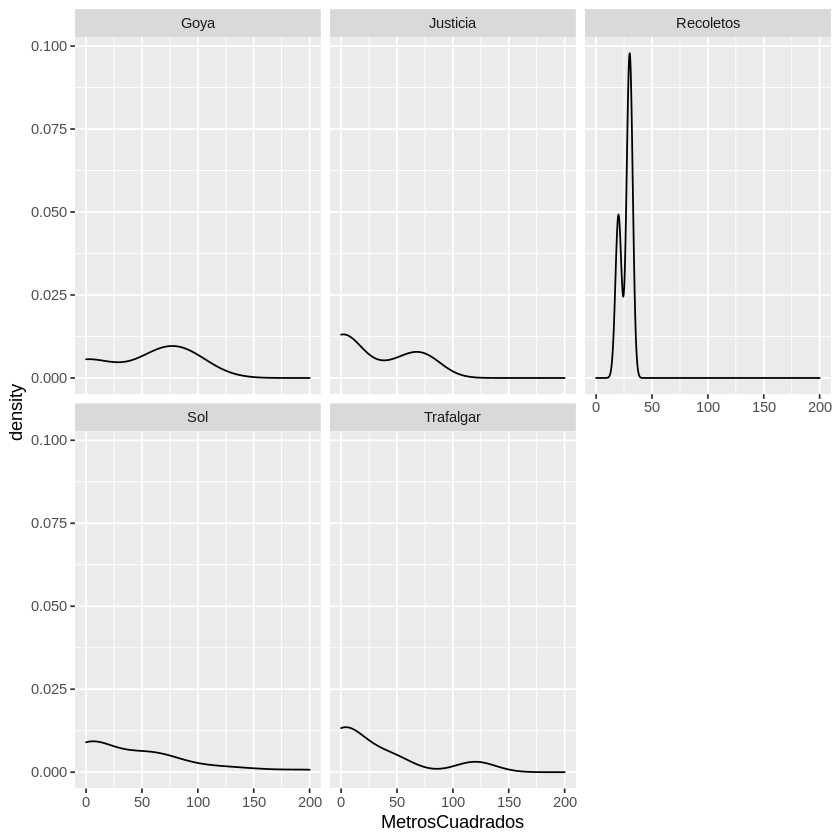

In [29]:
ggplot(data=airbnb_entire2, aes(MetrosCuadrados)) +
geom_density(alpha=0.7)+facet_wrap(~ Barrio)

**Esta claro que las medias de metros cuadrados de cada uno de estos 5 barrios parecen ser diferentes, pero ¿son estadísticamente diferentes?
¿Que test habría que usar para comprobarlo?**

In [30]:
summary(aov( MetrosCuadrados ~ Barrio, data=airbnb_entire2))

            Df Sum Sq Mean Sq F value Pr(>F)
Barrio       4   5832    1458   0.637  0.637
Residuals   85 194490    2288               
1645 observations deleted due to missingness

**Respuesta:**Usamos ANOVA para comparar las medias de tres o más grupos de datos. El p-valor es realmente alto, por lo que podemos aceptar la hipótesis nula que era que las medias eran iguales

**Para únicamente los pisos de alquiler en el barrio de Sol:**

``barrio_sol<-subset(airbnb_entire,Barrio=="Sol")``

**Calcular un modelo lineal que combine alguna de estas variables:**
* NumBanyos
* NumDormitorios
* MaxOcupantes
* MetrosCuadrados

In [31]:
barrio_sol<-subset(airbnb_entire,Barrio=="Sol")
linear_model_sol <- lm(Precio ~ NumBanyos+NumDormitorios+MaxOcupantes+MetrosCuadrados, data=barrio_sol)
summary(linear_model_sol)


Call:
lm(formula = Precio ~ NumBanyos + NumDormitorios + MaxOcupantes + 
    MetrosCuadrados, data = barrio_sol)

Residuals:
    Min      1Q  Median      3Q     Max 
-67.852 -15.599  -4.021  10.042 108.406 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)     42.28673   10.25650   4.123 0.000127 ***
NumBanyos       15.70888   10.15721   1.547 0.127701    
NumDormitorios  22.75344    6.55828   3.469 0.001022 ** 
MaxOcupantes    -2.85045    2.60279  -1.095 0.278223    
MetrosCuadrados  0.29900    0.09997   2.991 0.004155 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 32.42 on 55 degrees of freedom
  (641 observations deleted due to missingness)
Multiple R-squared:  0.6108,	Adjusted R-squared:  0.5825 
F-statistic: 21.58 on 4 and 55 DF,  p-value: 9.534e-11


**Primero calculamos la correlación para ver como se relacionan estas variables entre sí.**

In [32]:
#install.packages("corrplot")
#library(corrplot)

In [33]:
dataMP <- cbind(barrio_sol$Precio,barrio_sol$NumBanyos,barrio_sol$NumDormitorios,barrio_sol$MaxOcupantes,barrio_sol$MetrosCuadrados)
colnames(dataMP) <- c('Precio','NumBanyos','NumDormitorios','MaxOcupantes','MetrosCuadrados')
dataMP<- na.omit(dataMP)
dataP <- as.data.frame(dataMP)
corrP <- round(cor(dataP, method='pearson'),2)
corrP

,Precio,NumBanyos,NumDormitorios,MaxOcupantes,MetrosCuadrados
Precio,1.00,0.60,0.72,0.53,0.64
NumBanyos,0.60,1.00,0.69,0.70,0.48
NumDormitorios,0.72,0.69,1.00,0.79,0.57
MaxOcupantes,0.53,0.70,0.79,1.00,0.43
MetrosCuadrados,0.64,0.48,0.57,0.43,1.00


,NumBanyos,NumDormitorios,MaxOcupantes,MetrosCuadrados
NumBanyos,1.00,0.69,0.70,0.48
NumDormitorios,0.69,1.00,0.79,0.57
MaxOcupantes,0.70,0.79,1.00,0.43
MetrosCuadrados,0.48,0.57,0.43,1.00


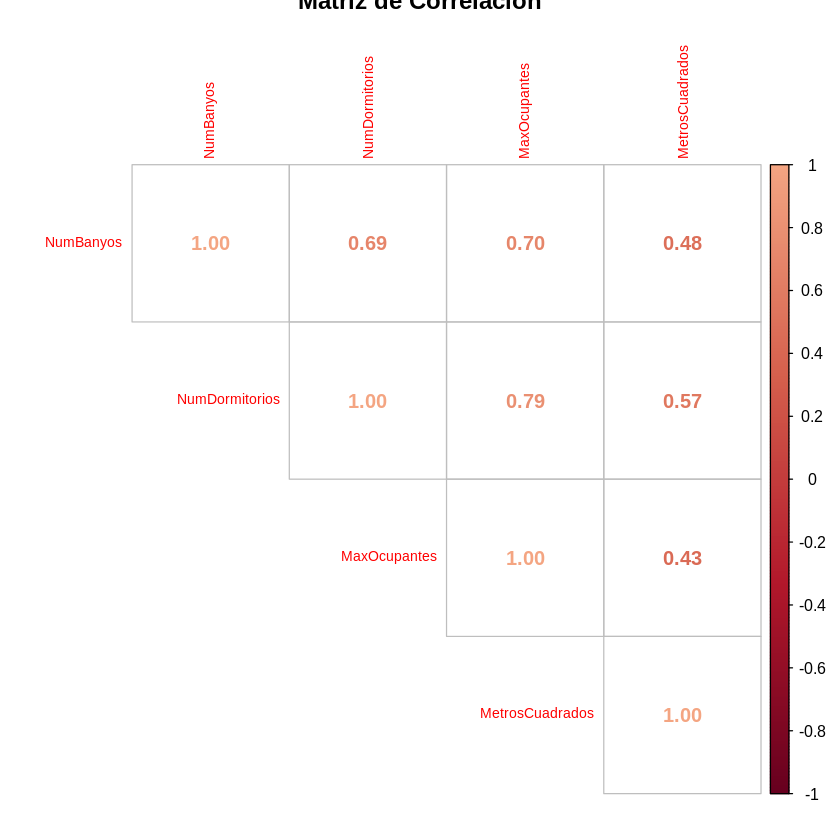

In [34]:
dataM <- cbind(barrio_sol$NumBanyos,barrio_sol$NumDormitorios,barrio_sol$MaxOcupantes,barrio_sol$MetrosCuadrados)
colnames(dataM) <- c('NumBanyos','NumDormitorios','MaxOcupantes','MetrosCuadrados')
dataM<- na.omit(dataM)
data <- as.data.frame(dataM)
corr <- round(cor(data, method='pearson'),2)
corr
col2 <- colorRampPalette(c("#67001F", "#B2182B", "#D6604D", "#F4A582"))
matriz_corr <- corrplot(corr, method="number", col=col2(200),type="upper", 
     title= "Matriz de Correlación", tl.cex = 0.7,
     sig.level = 0.05, addCoef.col = "black", insig = "blank")

**Se observa que la correlación entre el número de dormitorios y los metros cuadrados es sorprendentemente baja.**
**¿Son de fiar esos números?**

**Mediante un histograma o curvas de densidad podemos descartar números que notienen sentido en el dataframe barrio_sol,
para tener una matriz de correlación que tenga mayor sentido.**


In [35]:
#install.packages("GGally")
#library("GGally")

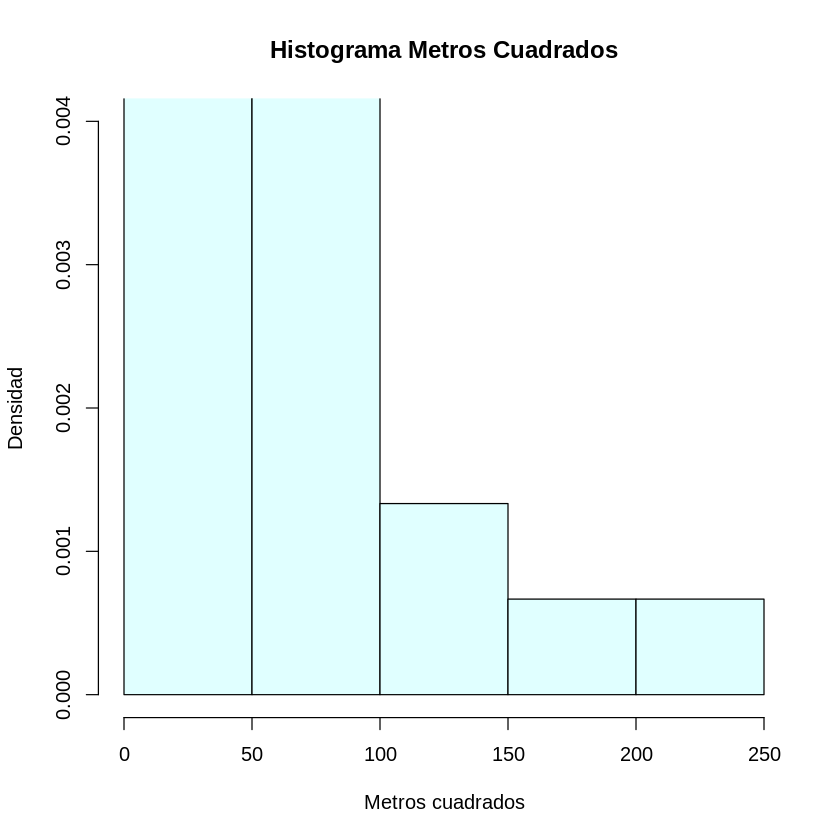

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



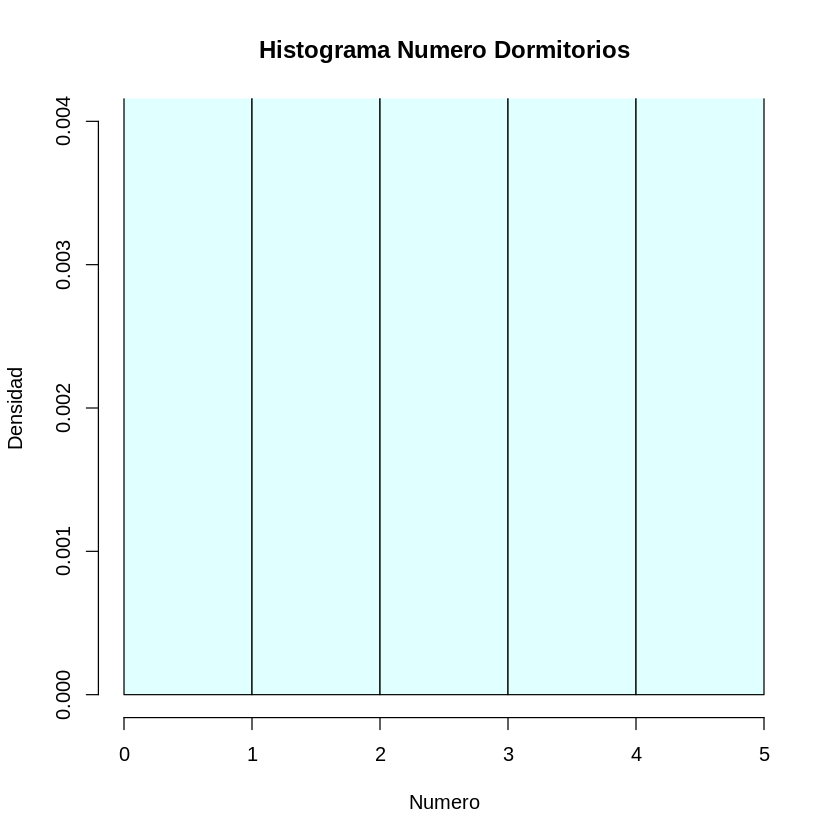

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



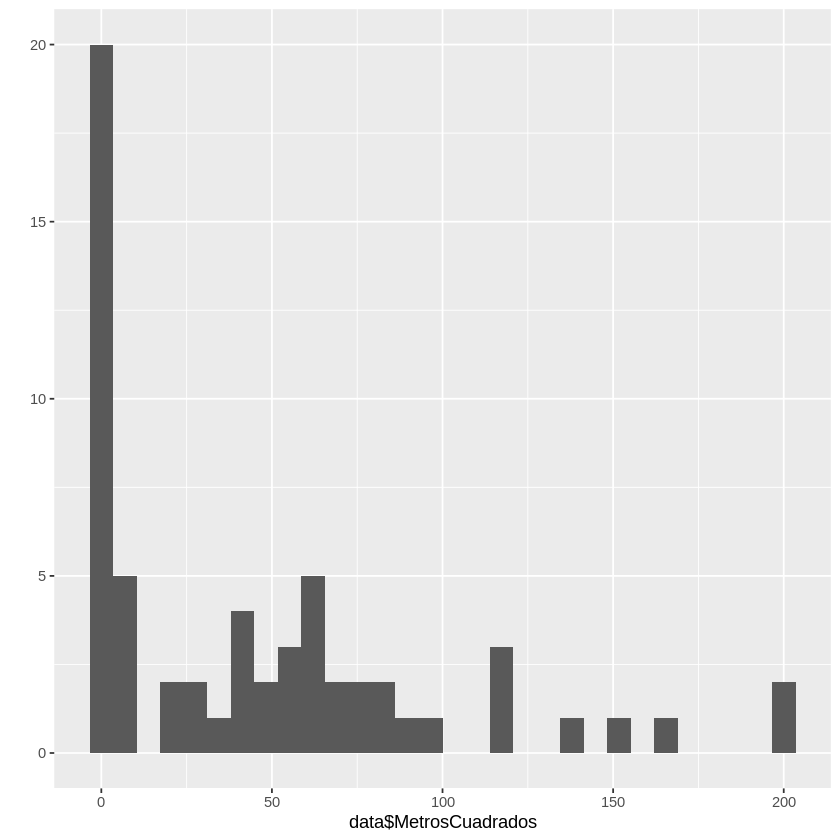

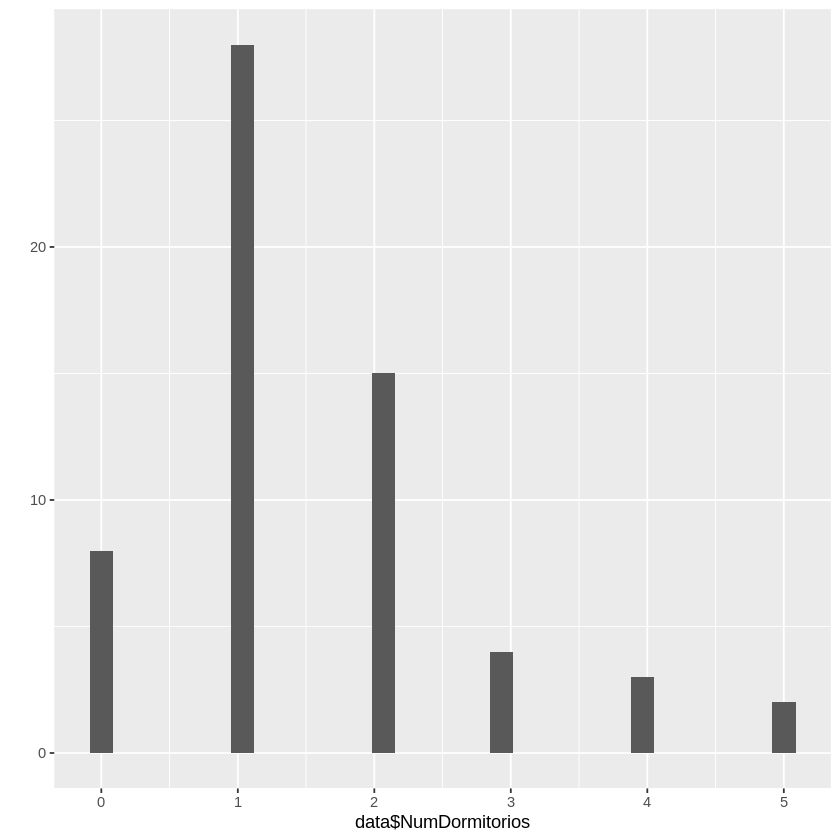

In [36]:

hist(data$MetrosCuadrados,freq=FALSE, col="lightcyan",ylim=c(0,0.004),
     main="Histograma Metros Cuadrados",xlab="Metros cuadrados",ylab="Densidad")
hist(data$NumDormitorios,freq=FALSE, col="lightcyan",ylim=c(0,0.004),
     main="Histograma Numero Dormitorios",xlab="Numero",ylab="Densidad")
qplot(data$MetrosCuadrados, geom='histogram', )
qplot(data$NumDormitorios, geom='histogram', )

   

Warning message:
“Continuous x aesthetic -- did you forget aes(group=...)?”
Warning message:
“Removed 641 rows containing missing values (stat_boxplot).”
Warning message:
“Removed 15 rows containing non-finite values (stat_boxplot).”


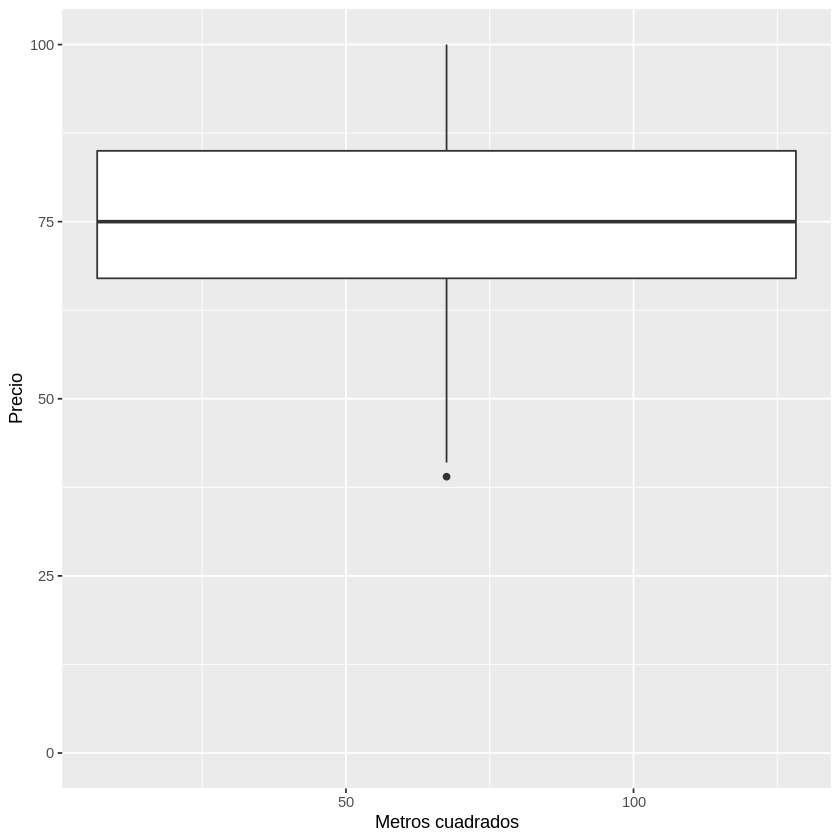

In [37]:
ggplot(data=barrio_sol,aes(x=MetrosCuadrados, y=Precio))+geom_boxplot()+ 
scale_color_discrete(name="Análisis precios y metros cuadrados")+ylab('Precio')+xlab('Metros cuadrados') + scale_y_continuous(limits=c(0,100))

Warning message:
“Continuous x aesthetic -- did you forget aes(group=...)?”
Warning message:
“Removed 227 rows containing non-finite values (stat_boxplot).”


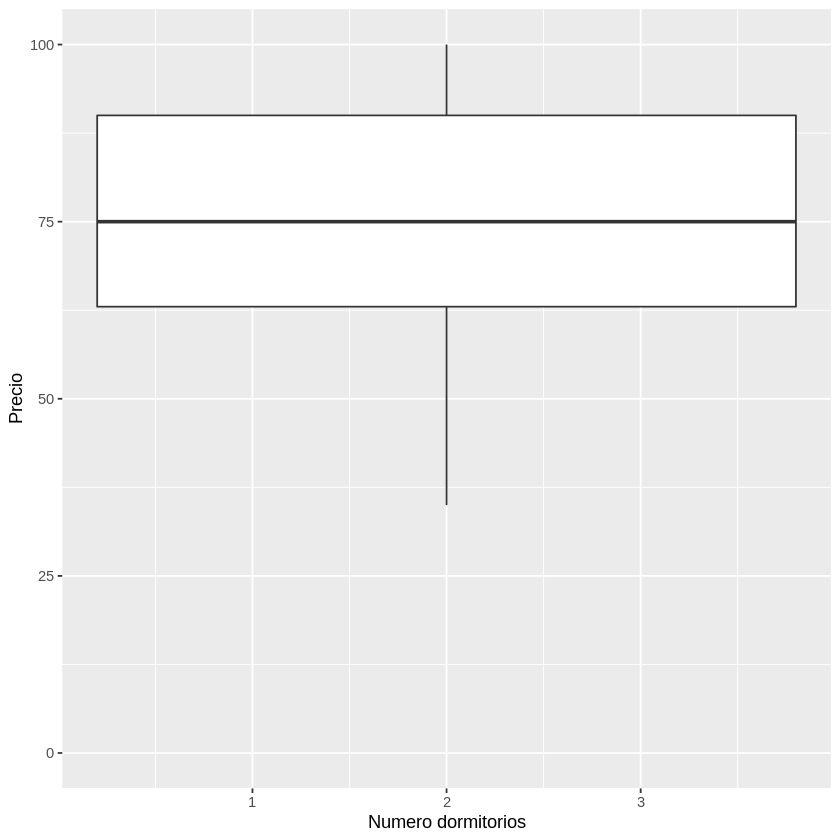

In [38]:
ggplot(data=barrio_sol,aes(x=NumDormitorios, y=Precio))+geom_boxplot()+ 
scale_color_discrete(name="Análisis precios y numero dormitorios")+ylab('Precio')+xlab('Numero dormitorios') + scale_y_continuous(limits=c(0,100))

In [39]:
barrio_sol_filter<-subset(barrio_sol,Precio <= 100 | MetrosCuadrados > 0 | NumDormitorios > 0 | MetrosCuadrados <= 100 | NumDormitorios <= 3)
barrio_sol_filter<- droplevels(barrio_sol_filter)
str (barrio_sol_filter)


'data.frame':	701 obs. of  14 variables:
 $ CodigoPostal   : Factor w/ 10 levels "28001","28004",..: 5 5 5 4 5 5 3 5 4 4 ...
 $ Barrio         : Factor w/ 1 level "Sol": 1 1 1 1 1 1 1 1 1 1 ...
 $ TipoPropiedad  : Factor w/ 5 levels "Apartment","Condominium",..: 1 2 1 1 1 1 1 1 1 1 ...
 $ TipoAlquiler   : Factor w/ 1 level "Entire home/apt": 1 1 1 1 1 1 1 1 1 1 ...
 $ MaxOcupantes   : int  4 6 4 6 4 4 10 6 4 4 ...
 $ NumBanyos      : num  1 1 1 1 1 1 2 1 1 1 ...
 $ NumDormitorios : int  1 2 1 2 1 1 4 2 1 1 ...
 $ NumCamas       : int  1 3 2 2 2 2 7 4 2 1 ...
 $ TipoCama       : Factor w/ 3 levels "Futon","Pull-out Sofa",..: 3 3 3 3 3 3 3 3 3 3 ...
 $ Comodidades    : Factor w/ 600 levels "Cable TV,Wireless Internet,Air conditioning,Kitchen,Elevator in building,Buzzer/wireless intercom,Heating,Famil"| __truncated__,..: 422 424 168 306 263 577 252 320 224 61 ...
 $ PiesCuadrados  : int  646 NA NA NA NA NA NA NA NA 753 ...
 $ Precio         : int  75 130 100 160 49 70 210 120 50 100 ...
 

In [40]:
dataMP2 <- cbind(barrio_sol_filter$Precio,barrio_sol_filter$NumBanyos,barrio_sol_filter$NumDormitorios,barrio_sol_filter$MaxOcupantes,barrio_sol_filter$MetrosCuadrados)
colnames(dataMP2) <- c('Precio','NumBanyos','NumDormitorios','MaxOcupantes','MetrosCuadrados')
dataMP2<- na.omit(dataMP2)
dataP2 <- as.data.frame(dataMP2)
corrP2 <- round(cor(dataP2, method='pearson'),2)
corrP2

,Precio,NumBanyos,NumDormitorios,MaxOcupantes,MetrosCuadrados
Precio,1.00,0.60,0.72,0.53,0.64
NumBanyos,0.60,1.00,0.69,0.70,0.48
NumDormitorios,0.72,0.69,1.00,0.79,0.57
MaxOcupantes,0.53,0.70,0.79,1.00,0.43
MetrosCuadrados,0.64,0.48,0.57,0.43,1.00


**Respuesta:** Se ha procedido a centrar los datos ya que se han eliminado los valores a cero y se ha limitado el límite superior de las variables quitando los valores outliers. Con esto se ha mejorado la correlación entre las variables

**Una vez que hayamos filtrado los datos correspondientes calcular el valor o la combinación de valores que mejor nos permite obtener el precio de un inmueble.**

In [41]:
linear_model_sol2 <- lm(Precio ~ NumBanyos+NumDormitorios+MaxOcupantes+MetrosCuadrados, data=barrio_sol_filter)
summary(linear_model_sol2)


Call:
lm(formula = Precio ~ NumBanyos + NumDormitorios + MaxOcupantes + 
    MetrosCuadrados, data = barrio_sol_filter)

Residuals:
    Min      1Q  Median      3Q     Max 
-67.852 -15.599  -4.021  10.042 108.406 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)     42.28673   10.25650   4.123 0.000127 ***
NumBanyos       15.70888   10.15721   1.547 0.127701    
NumDormitorios  22.75344    6.55828   3.469 0.001022 ** 
MaxOcupantes    -2.85045    2.60279  -1.095 0.278223    
MetrosCuadrados  0.29900    0.09997   2.991 0.004155 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 32.42 on 55 degrees of freedom
  (641 observations deleted due to missingness)
Multiple R-squared:  0.6108,	Adjusted R-squared:  0.5825 
F-statistic: 21.58 on 4 and 55 DF,  p-value: 9.534e-11


In [42]:
#install.packages("MASS")
#library(MASS)
fit <- lm(Precio ~ NumBanyos+NumDormitorios+MaxOcupantes+MetrosCuadrados, data=barrio_sol_filter)
step <- stepAIC(fit, direction="both")
step$anova

Start:  AIC=422.24
Precio ~ NumBanyos + NumDormitorios + MaxOcupantes + MetrosCuadrados

                  Df Sum of Sq   RSS    AIC
- MaxOcupantes     1    1260.7 59074 421.53
<none>                         57813 422.24
- NumBanyos        1    2514.2 60328 422.79
- MetrosCuadrados  1    9403.7 67217 429.28
- NumDormitorios   1   12652.6 70466 432.11

Step:  AIC=421.53
Precio ~ NumBanyos + NumDormitorios + MetrosCuadrados

                  Df Sum of Sq   RSS    AIC
- NumBanyos        1    1586.6 60661 421.12
<none>                         59074 421.53
+ MaxOcupantes     1    1260.7 57813 422.24
- MetrosCuadrados  1   10185.3 69259 429.08
- NumDormitorios   1   12712.4 71786 431.23

Step:  AIC=421.12
Precio ~ NumDormitorios + MetrosCuadrados

                  Df Sum of Sq   RSS    AIC
<none>                         60661 421.12
+ NumBanyos        1    1586.6 59074 421.53
+ MaxOcupantes     1     333.1 60328 422.79
- MetrosCuadrados  1   11724.9 72386 429.73
- NumDormitorios   1   2739

Step,Df,Deviance,Resid. Df,Resid. Dev,AIC
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
,NA,NA,55,57813.38,422.2379
- MaxOcupantes,1,1260.707,56,59074.08,421.5322
- NumBanyos,1,1586.594,57,60660.68,421.1224


**Respuesta** con lo cual ahora lanzamos el modelo con un AIC menor al ser el mejor modelo posible

In [43]:
linear_model_sol2 <- lm(Precio ~ NumDormitorios+MetrosCuadrados, data=barrio_sol_filter)
summary(linear_model_sol2)


Call:
lm(formula = Precio ~ NumDormitorios + MetrosCuadrados, data = barrio_sol_filter)

Residuals:
    Min      1Q  Median      3Q     Max 
-65.287 -15.730  -1.842  10.737 106.700 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)     48.29992    7.00735   6.893 4.80e-09 ***
NumDormitorios  22.36155    4.40760   5.073 4.45e-06 ***
MetrosCuadrados  0.32837    0.09893   3.319  0.00158 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 32.62 on 57 degrees of freedom
  (641 observations deleted due to missingness)
Multiple R-squared:  0.5917,	Adjusted R-squared:  0.5773 
F-statistic: 41.29 on 2 and 57 DF,  p-value: 8.205e-12


**¿Que variable es más fiable para conocer el precio de un inmueble, el número de habitaciones o los metros cuadrados?**

**Respuesta:**Es más fiable el número de dormitorios ya que tiene un Pr menor

**Responde con su correspondiente margen de error del 95%, ¿cuantos euros incrementa el precio del alquiler por cada metro cuadrado extra del piso?**

In [44]:
linear_model_sol3 <- lm(Precio ~ MetrosCuadrados, data=barrio_sol_filter)
summary(linear_model_sol3)
confint(linear_model_sol3)


Call:
lm(formula = Precio ~ MetrosCuadrados, data = barrio_sol_filter)

Residuals:
    Min      1Q  Median      3Q     Max 
-61.403 -25.126  -6.573  10.003 138.353 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)     69.57277    6.70573  10.375 7.79e-15 ***
MetrosCuadrados  0.61367    0.09721   6.313 4.13e-08 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 38.96 on 58 degrees of freedom
  (641 observations deleted due to missingness)
Multiple R-squared:  0.4073,	Adjusted R-squared:  0.397 
F-statistic: 39.85 on 1 and 58 DF,  p-value: 4.134e-08


,2.5 %,97.5 %
(Intercept),56.1497852,82.9957569
MetrosCuadrados,0.4190858,0.8082612


**Respuesta:** Se incremento en 0.1419054

**Responde con su correspondiente margen de error del 95%, ¿cuantos euros incrementa el precio del alquiler por cada habitación?**

In [45]:
linear_model_sol4 <- lm(Precio ~ NumDormitorios, data=barrio_sol_filter)
summary(linear_model_sol4)
confint(linear_model_sol4)


Call:
lm(formula = Precio ~ NumDormitorios, data = barrio_sol_filter)

Residuals:
     Min       1Q   Median       3Q      Max 
-206.225  -22.676   -4.312   16.416  263.960 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)      52.584      2.568   20.48   <2e-16 ***
NumDormitorios   33.364      1.459   22.87   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 38.9 on 699 degrees of freedom
Multiple R-squared:  0.4281,	Adjusted R-squared:  0.4272 
F-statistic: 523.1 on 1 and 699 DF,  p-value: < 2.2e-16


,2.5 %,97.5 %
(Intercept),47.54299,57.62561
NumDormitorios,30.50004,36.22803


**Respuesta:** Se incrementa en 26.06883

**¿Cual es la probabilidad de encontrar, en el barrio de Sol, un apartamento en alquiler con 3 dormitorios?
¿Cual es el intervalo de confianza de esa probabilidad?**

In [46]:
n <- nrow(barrio_sol_filter)
ns <- nrow(barrio_sol_filter[barrio_sol_filter$NumDormitorios ==3, ])
print(paste("Eventos totales n:",n, "Casos éxito ns:", ns))

[1] "Eventos totales n: 701 Casos éxito ns: 55"


In [47]:
binom.test(ns,n)


	Exact binomial test

data:  ns and n
number of successes = 55, number of trials = 701, p-value < 2.2e-16
alternative hypothesis: true probability of success is not equal to 0.5
95 percent confidence interval:
 0.0596506 0.1009033
sample estimates:
probability of success 
            0.07845934 


**Respuesta:** La probabilidad es del 0.08064516 y el intervalo de confianza es [0.06132845, 0.10367897]